In [2]:
### cleanse customers 

import pandas as pd
import seaborn as sns

def summaryOfData(file, *s):
    print("DESCRIBE\n",file.describe(), "\n")
    print("TYPES\n\n",file.dtypes, "\n")
    print("SHAPE\n\n",file.shape, "\n")
    print("INFO\n\n", file.info(), "\n")
    ###print("VALUE COUNTS\n\n", file[s].value_counts(), "\n")
    print("UNIQUE\n\n",file.nunique(), "\n")
    print("IS NA SUM\n\n",file.isna().sum(), "\n")
    print("IS DUP \n\n",file[file.duplicated()], "\n")
        

In [3]:
dataCustomers=pd.read_csv("customers.csv")
print(dataCustomers.head())
summaryOfData(dataCustomers)
## Conclusion - nothing to clean for Customers. 

### cleanse products
dataProducts = pd.read_csv("products.csv")
print(dataProducts.head())
summaryOfData(dataProducts)
print('what are the category counts: \n',dataProducts.categ.value_counts())

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943
DESCRIBE
              birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000 

TYPES

 client_id    object
sex          object
birth         int64
dtype: object 

SHAPE

 (8623, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
INFO

 None 

UNIQUE

 client_id    8623
sex             2
birth          76
dtype: int64 

IS NA SUM

 client_id    0
sex          0
birth        0
dtype: int64 

IS DUP 

 Empty DataFrame
Columns: [client_id, sex, birth]

In [4]:
### cleanse transactions
dataTransactions = pd.read_csv("transactions.csv")
print(dataTransactions.head())
summaryOfData(dataTransactions) ## need to modify function - bc date is really what we should compare against

  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
DESCRIBE
        id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266                           336855     169195      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      1081                               13        200     12855 

TYPES

 id_prod       object
date          object
session_id    object
client_id     object
dtype: object 

SHAPE

 (337016, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ---

In [5]:
### things that are wrong 

#### 1. products - price cannot be negative (remove or impute? should it just be 0 then?)

### how many products are there in table? will removing this one impact metrics?
#print(dataProducts['id_prod'].nunique())
## !!! 3287 unique products

### change price of T_0 to 0 instead of -1 and run describe again 
print(dataProducts.loc[dataProducts['id_prod'] =='T_0'])
dataProducts.loc[[731],['price']] = 0 
print(dataProducts.loc[dataProducts['id_prod'] =='T_0'])

#### 2. transactions - dups 
dataTransactions = dataTransactions.drop_duplicates(keep= "first")


    id_prod  price  categ
731     T_0   -1.0      0
    id_prod  price  categ
731     T_0    0.0      0


0        19.99
1         5.13
2        17.99
3         4.99
4         3.99
         ...  
3282    115.99
3283     17.14
3284     11.22
3285     38.56
3286     25.16
Name: price, Length: 3287, dtype: float64

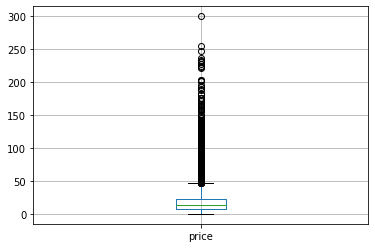

In [7]:
## products
dataProducts.boxplot(column='price') ## are these outliers? or just many diff products? how do i dtermine what is "outlier"?
dataProducts['price'].astype(float)

In [8]:
#display(dataTransactions[dataTransactions['id_prod']=='T_0'])
# remove test transactions 
# if the "date' has "test" then drop 
dataTransactions=dataTransactions[dataTransactions['date'].str.contains('test')==False]

In [9]:
## convert to proper format each of values -> $ should be floats, dates should be datetimes
dataTransactions['date'] =  pd.to_datetime(dataTransactions['date'])
#display(dataTransactions.dtypes)

In [10]:
dataTransactions['Month'] = dataTransactions['date'].dt.month
dataTransactions['Year'] = dataTransactions['date'].dt.year
dataTransactions['Day'] = dataTransactions['date'].dt.day
dataTransactions['Weekday'] = dataTransactions['date'].dt.weekday
dataTransactions['Hour'] = dataTransactions['date'].dt.hour
dataTransactions['Minute'] = dataTransactions['date'].dt.minute

In [11]:
Months = {1:'Jan',2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
Weekday = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
dataTransactions['Weekday'].replace(Weekday, inplace=True)
dataTransactions['Month'].replace(Months, inplace=True)

2021-03-01 00:01:07.843138
2022-02-28 23:59:58.040472


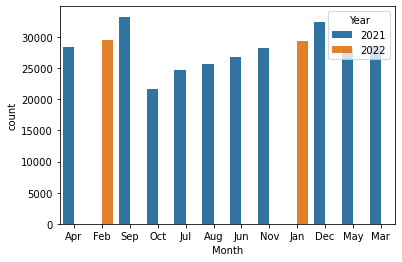

In [12]:
sns.countplot(data=dataTransactions, x='Month', hue='Year')
print(dataTransactions['date'].min())
print(dataTransactions['date'].max())

<AxesSubplot:xlabel='Year', ylabel='count'>

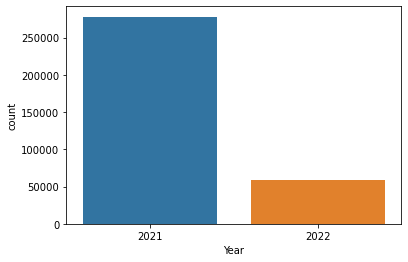

In [13]:
sns.countplot(x=dataTransactions.Year)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

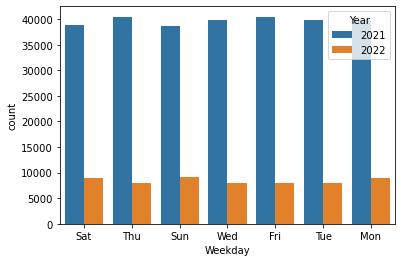

In [14]:
sns.countplot(data=dataTransactions, x='Weekday', hue='Year')

In [60]:
#### task2 Indicators of central tendency and dispersion. ####
# analyzing the transactions date and price
## merge products and transactions on 'id_prod' as left join

In [15]:
dataProductsTransactionsLeft = dataTransactions.merge(dataProducts,on=['id_prod'], how='left')
display(dataTransactions.shape)
display(dataProductsTransactionsLeft.shape)

(336816, 10)

(336816, 12)

In [16]:
display(dataProductsTransactionsLeft[dataProductsTransactionsLeft['id_prod'].isna()==True])
display(dataProductsTransactionsLeft[dataProductsTransactionsLeft['date'].isna()==True])
### there are no null values for dates or id_prod so thats good. should use left join

,id_prod,date,session_id,client_id,Month,Year,Day,Weekday,Hour,Minute,price,categ


,id_prod,date,session_id,client_id,Month,Year,Day,Weekday,Hour,Minute,price,categ


In [17]:
dataProductsTransactionsCustomersLeft = dataProductsTransactionsLeft.merge(dataCustomers, on='client_id', how='left')

336713


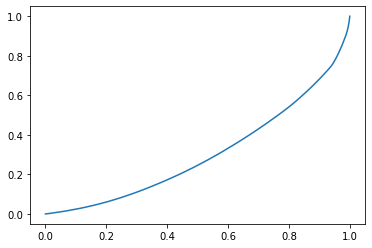

In [18]:
#### A concentration analysis, using a Lorenz curve and a Gini coefficient.
import numpy as np

price = dataProductsTransactionsCustomersLeft[dataProductsTransactionsCustomersLeft['price'] > 0]
priceOnly = price.price

def lorenzCurve(priceOnly):
    n = len(priceOnly)
    lorenz = np.cumsum(np.sort(priceOnly)) / priceOnly.sum()
    lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0
    xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
    sns.lineplot(data=priceOnly,x=xaxis,y=lorenz,drawstyle='steps-post')
    return lorenz,n

lorenzPriceAll,size = lorenzCurve(priceOnly)
print(size)

In [19]:
def gini(lorenz, size):
    #print(lorenz.sum())
    #print("size ",size)
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/size # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
    S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
    gini = 2*S
    return gini

gini(lorenzPriceAll,size)

0.392145510890881

<AxesSubplot:>

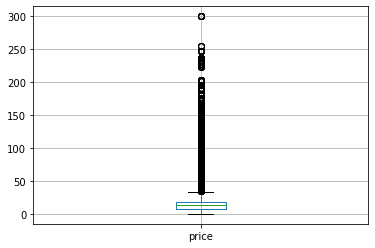

In [20]:
dataProductsTransactionsCustomersLeft.boxplot(column='price')

In [21]:
## central tendency
dataProductsTransactionsCustomersLeft['price'].describe()

count    336713.000000
mean         17.215189
std          17.855445
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [22]:
### anything above 19$ is outlier? rerun lorenz/gini w prices 0-19
dataProductsTransactionsCustomersLeftPriceLess19=dataProductsTransactionsCustomersLeft[dataProductsTransactionsCustomersLeft['price'] < 32]

In [23]:
### remove anything above 40$ and do lorenz curve 0-40$ and see the gini coefficient 
dataProductsTransactionsCustomersLeftPriceLess19['price'].describe()

count    315463.000000
mean         13.670407
std           6.754064
min           0.620000
25%           8.090000
50%          12.990000
75%          17.990000
max          31.990000
Name: price, dtype: float64

<AxesSubplot:>

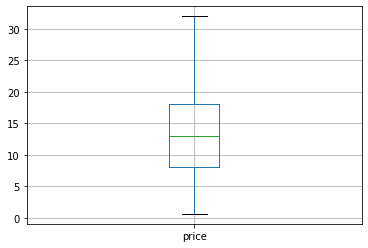

In [24]:
dataProductsTransactionsCustomersLeftPriceLess19.boxplot(column='price')

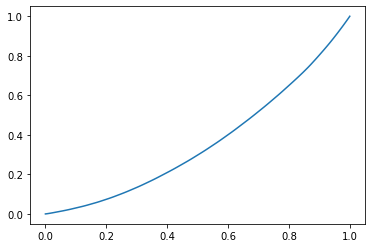

In [25]:
#### lorenz + gini on price 0-19
price19 = dataProductsTransactionsCustomersLeftPriceLess19[dataProductsTransactionsCustomersLeftPriceLess19['price'] > 0]
price19Only = price19.price
lorenzCurve19,size19 = lorenzCurve(price19Only)

In [26]:
gini(lorenzCurve19,size19)

0.28016651177326046

<AxesSubplot:xlabel='Month', ylabel='price'>

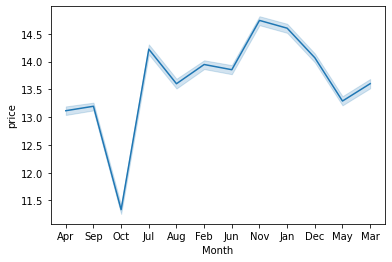

In [27]:
### time series graph (i.e a graph in which the abscissa axis represents dates).
sns.lineplot(data=dataProductsTransactionsCustomersLeftPriceLess19,x='Month',y='price')

<AxesSubplot:xlabel='Day', ylabel='price'>

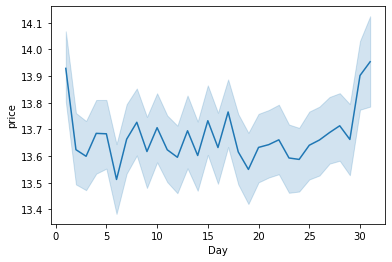

In [28]:
sns.lineplot(data=dataProductsTransactionsCustomersLeftPriceLess19,x='Day',y='price')

In [45]:
### Bivariate analyses.

<AxesSubplot:xlabel='birth', ylabel='Count'>

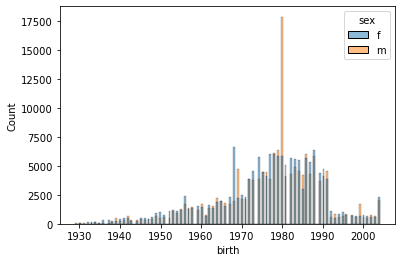

In [29]:
sns.histplot(data=dataProductsTransactionsCustomersLeftPriceLess19, x='birth', hue='sex')
## follow up is this the same customer buying a lot??

<AxesSubplot:xlabel='Day', ylabel='Count'>

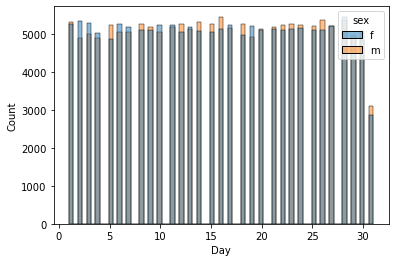

In [30]:
sns.histplot(data=dataProductsTransactionsCustomersLeftPriceLess19, x='Day', hue='sex')

(25.004941969879567,
 3.717456035886804e-06,
 2,
 array([[1.04392247e+05, 1.04911753e+05],
        [5.29412693e+04, 5.32047307e+04],
        [6.48386657e+00, 6.51613343e+00]]))

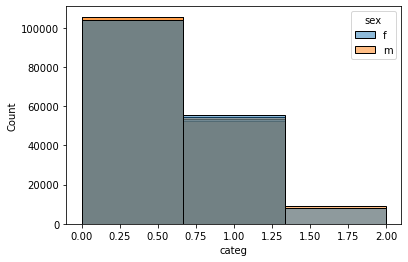

In [49]:
############# TASK 3 ##########################

from scipy import stats
## Is there a correlation between gender and categories of products purchased? (gender qualitative, product qualitative)
#dataProductsTransactionsCustomersLeftPriceLess19.corr(method='pearson') -- didnt tell me anything
df = dataProductsTransactionsCustomersLeftPriceLess19
sns.histplot(data=dataProductsTransactionsCustomersLeftPriceLess19, x='categ', bins=3, hue='sex')
sns.histplot(data=dataProductsTransactionsCustomersLeft, x='categ', bins=3, hue='sex')
### Conclusion -> noticed that categ 2 is now missing, is it because its higher than 32$? must be.

## Use CHI Square
crosstab = pd.crosstab(df['categ'], df['sex'])
stats.chi2_contingency(crosstab)

# Conclusion We can reject the null hypothesis as the p-value is less than 0.05 (h0 = there is no relationship bewteen gender and categories)
# there is correlation b/w gender and categoeis

<AxesSubplot:xlabel='categ', ylabel='Count'>

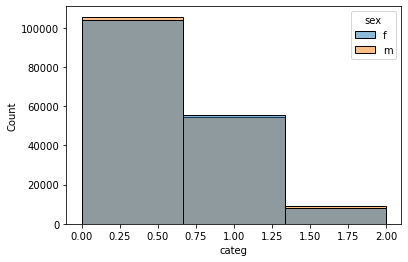

In [43]:
## LinearRegression (2 quantitative)
## ANOVA (1 quantitative, 1 qualitative)
## ChiSquared (relationship b/w 2 qualitative variables, frequency or count)
## r^2 - correlated - 0 unrelated, 1 perfectly related 
## eta^2 - what portion of relation is specific to this one variable
## xi_n 

Eta-Squared (η²): 0.6000951467473872


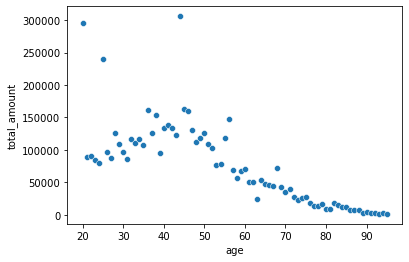

In [51]:
## correlation of age (age qualitative) and total $ amount of purchases? (amount of purchases : quantitative)
## use ANOVA 
import statsmodels.api as sm
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols

current_year = datetime.now().year
dataProductsTransactionsCustomersLeft['age'] = current_year - dataProductsTransactionsCustomersLeft['birth']

age_data = dataProductsTransactionsCustomersLeft.groupby(['age']).agg({'price': 'sum'}).reset_index()
age_data = age_data.rename(columns={'price': 'total_amount'})
#print(age_data.head(5))

sns.scatterplot(data=age_data, x='age',y='total_amount')

# use eta sq to determine how related age is to total purchase amount 
# Perform one-way ANOVA
model = ols('total_amount ~ age', data=age_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate eta-squared
eta_squared = anova_table['sum_sq']['age'] / (anova_table['sum_sq']['age'] + anova_table['sum_sq']['Residual'])

print("Eta-Squared (η²):", eta_squared)
# ETA is .6 meaning age predicts spend more than half the time. they are highly correlated 


In [54]:
# age and average basket size (in number of items)?
# age qualitative, basket size quantitative
# basket size -> 
df = dataProductsTransactionsCustomersLeft
basket_size = df.groupby(['Day','Month', 'Year','age','sex','client_id','session_id']).agg({'price': 'count'}).reset_index()
basket_size = df.rename(columns={'price': 'basket_size'})
#print(basket_size.head(2))

#sns.scatterplot(data=basket_size, x='age',y='basket_size')
## use eta/anova
#plt.figure(figsize=(10,6))
#sns.boxplot(x="age", y="basket_size", data=basket_size)

# Perform one-way ANOVA
model = ols('basket_size ~ age', data=basket_size).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate eta-squared
eta_squared = anova_table['sum_sq']['age'] / (anova_table['sum_sq']['age'] + anova_table['sum_sq']['Residual'])

print("Eta-Squared (η²):", eta_squared)
# so age DOES NOT predict basket size

Eta-Squared (η²): 0.04474462855734159


In [67]:
# age and Categories of purchased products?
# age qualitative, categories qualitative
# chi sq

from scipy import stats
df = dataProductsTransactionsCustomersLeft
crosstab = pd.crosstab(df['categ'], df['age'])
#print(crosstab)
stats.chi2_contingency(crosstab)

# Conclusion CHI - p is 0 means there is a high relatiosnip b/w age and categories.

## keep the histplot for decades and categories 

(153915.5289559564,
 0.0,
 150,
 array([[4.57024899e+03, 1.35714253e+03, 1.38264337e+03, 1.26384675e+03,
         1.35216675e+03, 3.10923717e+03, 1.46536563e+03, 1.43426703e+03,
         1.83046309e+03, 1.72970365e+03, 1.52942872e+03, 1.35154478e+03,
         1.83543886e+03, 5.27183321e+03, 5.54674476e+03, 5.05787490e+03,
         7.71618249e+03, 6.05302983e+03, 7.35046306e+03, 4.53541857e+03,
         6.36401574e+03, 6.61156053e+03, 6.28315940e+03, 5.77749631e+03,
         1.48514433e+04, 7.72364616e+03, 7.63159433e+03, 6.23029180e+03,
         5.38378814e+03, 5.62635715e+03, 6.02939490e+03, 5.19159885e+03,
         4.87999096e+03, 2.83308167e+03, 2.95001238e+03, 4.42781744e+03,
         5.54674476e+03, 2.56252393e+03, 2.14207097e+03, 2.53515717e+03,
         2.63778252e+03, 1.87213520e+03, 1.89390422e+03, 9.16164502e+02,
         2.02700619e+03, 1.76204619e+03, 1.74836281e+03, 1.66501858e+03,
         2.65457576e+03, 1.58416224e+03, 1.32106816e+03, 1.49895210e+03,
         1.04180281

In [66]:
## Age and  purchase frequency (age qualitative, purchase frequnecy qualitative? or quantitative ? check which one makes more sense )
## frequency is per month (across all years together)

df = dataProductsTransactionsCustomersLeft
#monthly_data = df.groupby(['Month','age']).agg({'price': 'count'}).reset_index()
monthly_data = df.groupby(['age']).agg({'price': 'count'}).reset_index()
monthly_data = monthly_data.rename(columns={'price': 'purchase_count'})
#print(monthly_data.head(2))

# Perform one-way ANOVA
model = ols('purchase_count ~ age', data=monthly_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate eta-squared
eta_squared = anova_table['sum_sq']['age'] / (anova_table['sum_sq']['age'] + anova_table['sum_sq']['Residual'])

print("Eta-Squared (η²):", eta_squared)
# Conclusion ETA - age and frequency are related - eta is .28

#use CHIsquared
crosstab = pd.crosstab(monthly_data['age'], monthly_data['purchase_count'])
#print(crosstab)
stats.chi2_contingency(monthly_data)
# Conclusion CHI - age and frquency are related - p is 0?

Eta-Squared (η²): 0.2801443038110604


(29310.370209180128,
 0.0,
 75,
 array([[9.43997795e+01, 7.27360022e+03],
        [2.82251241e+01, 2.17477488e+03],
        [2.87632336e+01, 2.21623677e+03],
        [2.63289287e+01, 2.02867107e+03],
        [2.81610634e+01, 2.16983894e+03],
        [6.43681450e+01, 4.95963186e+03],
        [3.05184955e+01, 2.35148150e+03],
        [2.98907011e+01, 2.30310930e+03],
        [3.80648405e+01, 2.93293516e+03],
        [3.60020875e+01, 2.77399791e+03],
        [3.18893935e+01, 2.45711061e+03],
        [2.82379362e+01, 2.17576206e+03],
        [3.82185861e+01, 2.94478141e+03],
        [1.09018421e+02, 8.39998158e+03],
        [1.14694195e+02, 8.83730581e+03],
        [1.04636672e+02, 8.06236333e+03],
        [1.59408531e+02, 1.22825915e+04],
        [1.25161706e+02, 9.64383829e+03],
        [1.51900622e+02, 1.17040994e+04],
        [9.39257307e+01, 7.23707427e+03],
        [1.31606207e+02, 1.01403938e+04],
        [1.36718247e+02, 1.05342818e+04],
        [1.29966255e+02, 1.00140337e+04],
  